In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv('instagram_data3.csv')

In [3]:
data.shape

(155004, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155004 entries, 0 to 155003
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   User uuid              155004 non-null  int64  
 1   Likes                  155004 non-null  int64  
 2   Days passed from post  155004 non-null  int64  
 3   Numer of Tags          155004 non-null  int64  
 4   Numer of Comments      155004 non-null  int64  
 5   Year                   155004 non-null  int64  
 6   Month                  155004 non-null  int64  
 7   Day                    155004 non-null  int64  
 8   Hour                   155004 non-null  int64  
 9   Minute                 155004 non-null  int64  
 10  dayOfWeek              155004 non-null  int64  
 11  quarter                155004 non-null  int64  
 12  timeOfDay              155004 non-null  int64  
 13  Season                 155004 non-null  int64  
 14  Likes Score            155004 non-nu

In [5]:
data

,User uuid,Likes,Days passed from post,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute,dayOfWeek,quarter,timeOfDay,Season,Likes Score
0,1,506,657,3,11,2019,8,12,21,18,3,2,5,2,2.256189
1,1,385,657,0,1,2019,8,12,14,25,3,2,0,2,1.440677
2,1,373,666,4,15,2019,8,3,15,18,0,2,2,2,1.344735
3,1,312,667,4,1,2019,8,2,16,40,4,2,2,2,0.912993
4,1,513,674,5,0,2019,0,25,16,51,4,2,2,2,2.304160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154999,1089,9,821,0,1,2018,9,29,14,40,4,4,0,1,-0.957885
155000,1089,3,822,3,0,2018,9,28,20,59,6,4,5,1,-1.197742
155001,1089,2,822,0,0,2018,9,28,16,27,6,4,2,1,-1.245713
155002,1089,14,822,0,2,2018,9,28,14,37,6,4,0,1,-0.813972


In [6]:
data = data[(data['Year'] == 2020) | (data['Year']==2021)]

In [7]:
data

,User uuid,Likes,Days passed from post,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute,dayOfWeek,quarter,timeOfDay,Season,Likes Score
186,2,36,187,0,2,2020,1,23,22,6,3,3,5,0,2.735901
187,2,38,188,0,1,2020,1,23,18,49,3,3,5,0,2.927786
188,2,36,195,0,0,2020,1,15,23,41,2,3,5,0,2.735901
189,2,41,195,0,1,2020,1,15,22,3,2,3,5,0,3.263585
190,2,35,198,0,3,2020,1,13,19,19,4,3,5,0,2.591987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154847,1089,10,366,1,0,2020,3,27,6,14,4,1,1,3,-0.957885
154848,1089,43,375,0,1,2020,3,18,1,27,5,1,3,3,0.193425
154849,1089,74,386,2,15,2020,3,7,6,6,0,1,1,3,1.296764
154850,1089,3,423,2,0,2020,4,1,7,41,6,1,4,3,-1.197742


In [8]:
data.nunique()

User uuid                 1057
Likes                    30890
Days passed from post      367
Numer of Tags               31
Numer of Comments         4825
Year                         1
Month                       12
Day                         31
Hour                        24
Minute                      60
dayOfWeek                    7
quarter                      4
timeOfDay                    6
Season                       4
Likes Score                101
dtype: int64

### Removing columns that are not inputs

In [11]:
data2=data.drop(['User uuid', 'Days passed from post', 'Numer of Comments', 'quarter', 'Minute', 'Season', 'Likes', 'Year', 'Numer of Tags', 'Day', 'timeOfDay'], axis=1)

In [12]:
data2

,Month,Hour,dayOfWeek,Likes Score
186,1,22,3,2.735901
187,1,18,3,2.927786
188,1,23,2,2.735901
189,1,22,2,3.263585
190,1,19,4,2.591987
...,...,...,...,...
154847,3,6,4,-0.957885
154848,3,1,5,0.193425
154849,3,6,0,1.296764
154850,4,7,6,-1.197742


In [13]:
max(data2['dayOfWeek'])

6

In [14]:
file_path = "C:/Users/amala/Desktop/instagram_data4.csv"
data2.to_csv(file_path, index=False)

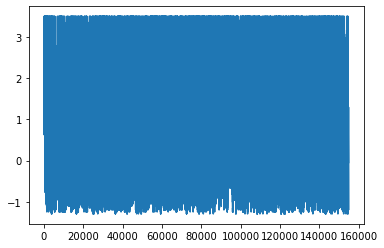

In [13]:
plt.plot(data2['Likes Score'])
plt.show()

In [15]:
def LikeScore(n):
    if -2 <= n < -1:
        return 'Very Low Like Score'
    elif -1 <= n < 0:
        return 'Low Like Score'
    elif 0 <= n < 1:
        return 'Average Like Score'
    elif 1 <= n < 2:
        return 'Above Average Like Score'
    elif 2 <= n < 3:
        return 'High Like Score'
    elif 3 <= n < 5:
        return 'Excellent Like Score'

In [16]:
data2['Likes Score']= data2['Likes Score'].apply(lambda x:LikeScore(x))

In [17]:
data2

,Month,Hour,dayOfWeek,Likes Score
186,1,22,3,High Like Score
187,1,18,3,High Like Score
188,1,23,2,High Like Score
189,1,22,2,Excellent Like Score
190,1,19,4,High Like Score
...,...,...,...,...
154847,3,6,4,Low Like Score
154848,3,1,5,Average Like Score
154849,3,6,0,Above Average Like Score
154850,4,7,6,Very Low Like Score


In [18]:
data2[data2['Likes Score'] == 'Excellent Like Score']

,Month,Hour,dayOfWeek,Likes Score
189,1,22,2,Excellent Like Score
192,5,22,4,Excellent Like Score
194,6,21,5,Excellent Like Score
198,3,22,3,Excellent Like Score
202,4,21,0,Excellent Like Score
...,...,...,...,...
153923,2,18,0,Excellent Like Score
153959,2,16,4,Excellent Like Score
154395,9,23,1,Excellent Like Score
154458,2,20,2,Excellent Like Score


In [19]:
data2.isna().sum()

Month          0
Hour           0
dayOfWeek      0
Likes Score    0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data2['Likes Score'] = encoder.fit_transform(data2['Likes Score'])

In [21]:
data2

,Month,Hour,dayOfWeek,Likes Score
186,1,22,3,3
187,1,18,3,3
188,1,23,2,3
189,1,22,2,2
190,1,19,4,3
...,...,...,...,...
154847,3,6,4,4
154848,3,1,5,1
154849,3,6,0,0
154850,4,7,6,5


In [22]:
X= data2.drop('Likes Score', axis=1)

In [23]:
y= data2['Likes Score']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

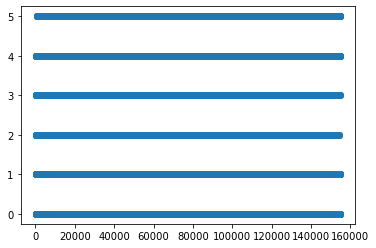

In [25]:
plt.scatter(y.index, y)
plt.show()

### KNN Classifier

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

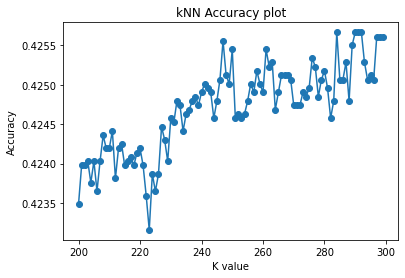

In [27]:
metric_k = []
neighbors = np.arange(200,300)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

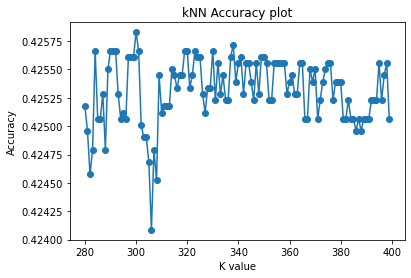

In [28]:
metric_k = []
neighbors = np.arange(280,400)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [29]:
max(metric_k)

0.42582716586852415

In [30]:
indices= list(enumerate(metric_k))

In [31]:
#last time it was 0.4260448410970831
indices
#k=224
#this time k=300

[(0, 0.4251741401828472),
 (1, 0.4249564649542882),
 (2, 0.42457553330430997),
 (3, 0.42479320853286895),
 (4, 0.4256639094471049),
 (5, 0.42506530256856767),
 (6, 0.42506530256856767),
 (7, 0.4252829777971267),
 (8, 0.42479320853286895),
 (9, 0.4255006530256857),
 (10, 0.4256639094471049),
 (11, 0.4256639094471049),
 (12, 0.4256639094471049),
 (13, 0.4252829777971267),
 (14, 0.42506530256856767),
 (15, 0.42511972137570747),
 (16, 0.42506530256856767),
 (17, 0.42560949063996517),
 (18, 0.42560949063996517),
 (19, 0.42560949063996517),
 (20, 0.42582716586852415),
 (21, 0.4256639094471049),
 (22, 0.4250108837614279),
 (23, 0.42490204614714844),
 (24, 0.42490204614714844),
 (25, 0.42468437091858946),
 (26, 0.4240857640400522),
 (27, 0.42479320853286895),
 (28, 0.4245211144971702),
 (29, 0.42544623421854594),
 (30, 0.42511972137570747),
 (31, 0.4251741401828472),
 (32, 0.4251741401828472),
 (33, 0.4251741401828472),
 (34, 0.4255006530256857),
 (35, 0.42544623421854594),
 (36, 0.42533739660

In [64]:
    classifier = KNeighborsClassifier(n_neighbors=300)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_score(y_test, y_pred)

0.42582716586852415

### DecisionTree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
model0= dt.fit(X_train,y_train)
y_pred =model0.predict(X_test)
accuracy_score(y_test,y_pred)

0.4046582498911624

In [75]:
y_trainpred= model0.predict(X_train)
accuracy_score(y_train,y_trainpred)

0.434892042285139

###  RandomForest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfclf= RandomForestClassifier()
rfclf.fit(X_train,y_train)
y_pred= rfclf.predict(X_test)
accuracy_score(y_test,y_pred)

0.4072159338267305

### SVC

In [53]:
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)
accuracy_score(y_test,y_pred)

0.42533739660426645

In [35]:
from sklearn.svm import SVC
svmclf= SVC(kernel='rbf')
model2 = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.42533739660426645

In [28]:
from sklearn.svm import SVC
svmclf= SVC(kernel='poly')
model3 = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)

In [30]:
y_pred = model3.predict(X_test)
accuracy_score(y_test,y_pred)

0.42533739660426645

### Hyperparameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Define the hyperparameter search space
param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform random search
random_search = RandomizedSearchCV(
    dt, param_distributions=param_dist, n_iter=10, cv=5
)

# Fit the random search to find the best hyperparameters
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the associated score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 3}
Best Score:  0.4218446021766301


In [ ]:
best_random = random_search.best_estimator_
y_pred = best_random.predict(X_test)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter search grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(
    dt, param_grid=param_grid, cv=5
)

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the associated score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score:  0.42169494786554856


In [71]:
#prediction from grid search, since it is best one
best_grid= grid_search.best_estimator_
y_pred= best_grid.predict(X_test)

In [36]:
import pickle
pickle.dump(classifier, open("knnclassifier.pkl", "wb"))

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   0,    9,    0,    0, 2091,    5],
       [   0,   12,    0,    0, 4896,   12],
       [   0,    1,    0,    0,  241,    0],
       [   0,    3,    0,    0,  705,    1],
       [   0,   10,    0,    0, 7791,   15],
       [   0,    7,    0,    0, 2550,   27]], dtype=int64)

In [44]:
y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [59]:
#elements of y_test
unique_elements, counts = np.unique(y_test, return_counts=True)

# Print the unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"Element: {element}, Count: {count}")

Element: 0, Count: 2105
Element: 1, Count: 4920
Element: 2, Count: 242
Element: 3, Count: 709
Element: 4, Count: 7816
Element: 5, Count: 2584


In [61]:
#decision tree
unique_elements, counts = np.unique(y_pred, return_counts=True)

# Print the unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"Element: {element}, Count: {count}")

Element: 0, Count: 125
Element: 1, Count: 2520
Element: 4, Count: 15495
Element: 5, Count: 236


In [63]:
#random forest
unique_elements, counts = np.unique(y_pred, return_counts=True)

# Print the unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"Element: {element}, Count: {count}")

Element: 0, Count: 93
Element: 1, Count: 2132
Element: 3, Count: 5
Element: 4, Count: 15849
Element: 5, Count: 297


In [65]:
#knn
unique_elements, counts = np.unique(y_pred, return_counts=True)

# Print the unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"Element: {element}, Count: {count}")

Element: 1, Count: 67
Element: 4, Count: 18261
Element: 5, Count: 48


In [70]:
#grid search decision tree
unique_elements, counts = np.unique(y_pred, return_counts=True)

# Print the unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"Element: {element}, Count: {count}")

Element: 4, Count: 18376


In [72]:
#random search decision tree
unique_elements, counts = np.unique(y_pred, return_counts=True)

# Print the unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"Element: {element}, Count: {count}")

Element: 4, Count: 18336
Element: 5, Count: 40


In [76]:
#training data
unique_elements, counts = np.unique(y_train, return_counts=True)

# Print the unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"Element: {element}, Count: {count}")

Element: 0, Count: 8701
Element: 1, Count: 19385
Element: 2, Count: 988
Element: 3, Count: 2955
Element: 4, Count: 30975
Element: 5, Count: 10497


In [77]:
#decision tree with training data
unique_elements, counts = np.unique(y_trainpred, return_counts=True)

# Print the unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"Element: {element}, Count: {count}")

Element: 0, Count: 383
Element: 1, Count: 10052
Element: 4, Count: 62209
Element: 5, Count: 857
